# CO416 - Machine Learning for Imaging

## Coursework 1 - Classification

In this coursework you will be applying the material taught in the course up to and including lecture 4.

$\mathbf{NOTE - \text{READ THIS}:}$ 
- During this coursework you will be asked to comment on the performance of various aspects of the models you develop. The discussion should be done along the following lines:
    - Maximum 100 words of discussion - You are asked to be brief and on point, platitudes and excessive writing will be penalized
    - You should mention effects on accuracy, and computational requirements i.e. time and computational complexities. Empirical arguments are accepted 
    
- When you are asked to change the hyperparamenters, validate the performance of your classifier and explicitly state the optimal hyperparameters you found and their accuracy

## Question 1 (50 Points) 

In this question we will use a toy spiral dataset as generated by the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function of sklearn

1) Create a dataset of 1000 points with a noise value of 0.4-0.5 and random_state=0 and augment it using polynomial features (recommended degree 10-15) (4 points)

In [0]:
## ADD YOUR CODE HERE
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


np.random.seed(42)

X, Y = make_moons(1000, noise=0.4, random_state=0)
# print(X.shape,Y.shape)
pol_transform = sklearn.preprocessing.PolynomialFeatures(degree=10)
X_pol = pol_transform.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_pol, Y, test_size=0.20, random_state=42)
# print(y_test.shape, x_test.shape,X_pol.shape)

2) Visualize your input data - the first 2 dimensions would suffice  (3 points)



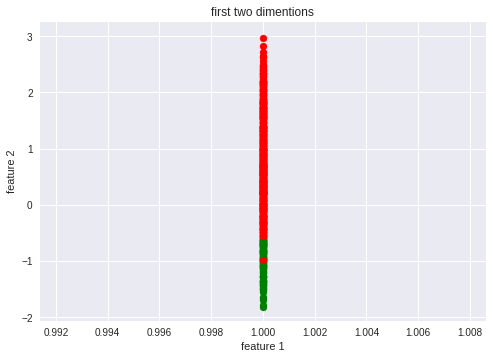

In [0]:
## ADD YOUR CODE HERE
plt.scatter(X_pol[Y==0, 0], X_pol[Y==0, 1], c="g",marker='o',label="class 0")
plt.scatter(X_pol[Y==1, 0], X_pol[Y==1, 1], c="r",marker='o',label="class 1")

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("first two dimentions")
#plt.legend(loc='upper left')
plt.show()
# print(X_pol[: 2, :])

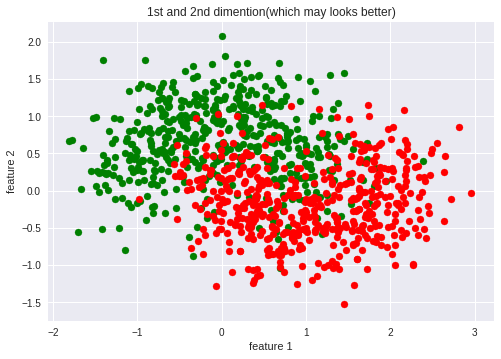

In [0]:
## ADD YOUR CODE HERE
plt.scatter(X_pol[Y==0, 1], X_pol[Y==0, 2], c="g",marker='o',label="class 0")
plt.scatter(X_pol[Y==1, 1], X_pol[Y==1, 2], c="r",marker='o',label="class 1")

plt.xlabel("feature 1")
plt.ylabel("feature 2")
#plt.legend(loc='upper left')
plt.title("1st and 2nd dimention(which may looks better)")
plt.show()
# print(X_pol[: 2, :])

3) Use a Decision Tree to classify the data (5 points)



In [0]:
## ADD YOUR CODE HERE
from sklearn import tree
from sklearn.model_selection import cross_val_score
clf_gini = tree.DecisionTreeClassifier(random_state=0)
clf_gini = clf_gini.fit(x_train, y_train)
val_score = (cross_val_score(clf_gini, x_train, y_train, cv=10)).mean()
y_gini = clf_gini.predict(x_test)
y_score = clf_gini.score(x_test,y_test)
print("The score of cross validation test is {:.2f}%:".format(val_score * 100))
print("The score of test cases is {:.2f}%:".format(y_score * 100))
print("The prediction of the test cases is:")
print(y_gini)

The score of cross validation test is 80.76%:
The score of test cases is 74.00%:
The prediction of the test cases is:
[0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1
 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1]


4) Try both Gini Impurity and Information Gain, which performs better? What is the difference between them? (4 points)

In [0]:
## ADD YOUR CODE HERE
dtree_gini = tree.DecisionTreeClassifier(random_state=0)
dtree_info = tree.DecisionTreeClassifier(random_state=0, criterion="entropy")

dtree_gini.fit(x_train, y_train)
dtree_info.fit(x_train, y_train)

score_gini = dtree_gini.score(x_test, y_test)
score_info = dtree_info.score(x_test, y_test)

print("performance of Gini Impurity:", score_gini)
print("performance of Information Gain:", score_info)
if score_gini > score_info:
    print("Gini Impurity performs better")
else:
    print("Information Gain performs better")

performance of Gini Impurity: 0.74
performance of Information Gain: 0.735
Gini Impurity performs better


In [0]:
## ADD YOUR CODE HERE
# Gini
score_gini = clf_gini.score(X=x_test, y=y_test)
# Information Gain
clf_en = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
clf_en = clf_en.fit(x_train, y_train)
score_en = clf_en.score(X=x_test, y=y_test)

print('score of gini is {:.2f}%'.format(score_gini * 100))
print('score of Information Gain is {:.2f}%'.format(score_en*100))

score of gini is 74.00%
score of Information Gain is 73.50%


Gini performs better.

---


Difference: They focus on two different aspect of the model using two metrics for choosing how to split a tree. 

*   Gini measurement is the probability of a random sample being classified incorrectly if we randomly pick a label according to the distribution in a branch.
*   Entropy is a measurement of information. This measures how you reduce the uncertainty about the label.



5) Perform classification using a tree depth of 1-20. Plot the accuracy versus tree depth. (5 points)



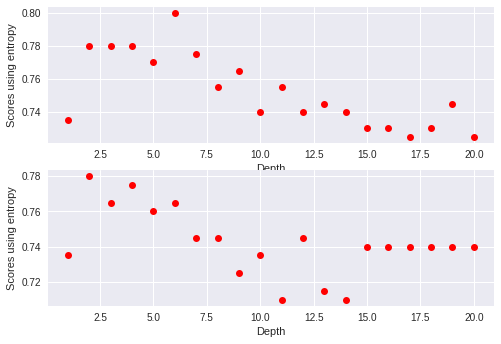

In [0]:
## ADD YOUR CODE HERE
score_en = [0] * 20
score_gini = [0] * 20
for d in range(20):
  clf = tree.DecisionTreeClassifier(random_state=0, max_depth = d + 1)
  clf. fit(x_train, y_train)
  score_gini[d] = clf.score(X=x_test, y=y_test)

for d in range(20):
  clf = tree.DecisionTreeClassifier(random_state=0, max_depth = d + 1, criterion='entropy')
  clf. fit(x_train, y_train)
  score_en[d] = clf.score(X=x_test, y=y_test)  
  
plt.figure(1)
plt.subplot(211)
plt.plot(range(1, 21), score_en,'ro')
plt.ylabel('Scores using entropy')
plt.xlabel('Depth')

plt.subplot(212)
plt.plot(range(1, 21),score_gini,'ro')
plt.ylabel('Scores using entropy')
plt.xlabel('Depth')
plt.show()

6) How does the depth of a tree affect performance and computational burden? (1 points)



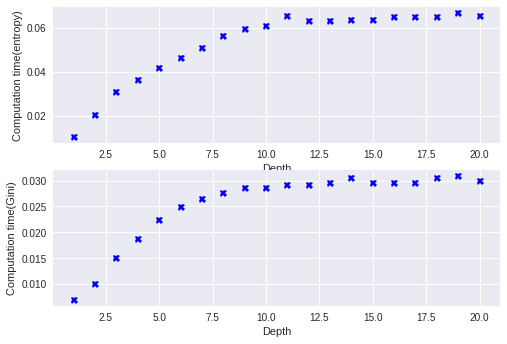

In [0]:
## ADD YOUR CODE HERE
import time

time_en = [0] * 20
time_gini = [0] * 20
for d in range(20):
  t1 = time.time()
  clf = tree.DecisionTreeClassifier(random_state=0, max_depth = d + 1)
  clf. fit(x_train, y_train)
  t2 = time.time()
  time_gini[d] = t2 - t1

for d in range(20):
  t1 = time.time()
  clf = tree.DecisionTreeClassifier(random_state=0, max_depth = d + 1, criterion='entropy')
  clf. fit(x_train, y_train)
  t2 = time.time()
  time_en[d] = t2 - t1
  
plt.figure(1)
plt.subplot(211)
plt.plot(range(1, 21),time_en,'bX')
plt.ylabel('Computation time(entropy)')
plt.xlabel('Depth')

plt.subplot(212)
plt.plot(range(1, 21),time_gini,'bX')
plt.ylabel('Computation time(Gini)')
plt.xlabel('Depth')
plt.show()


1.  Effect on performance: When the tree becomes deeper, it may cause overfitting, so the score will decrease.

2.  Effect on computational burden: When we make the tree deeper, the computational burden will be bigger.



7) Use Bootstrap Classifier to classify your data, base estimator should be a decision tree. Tune hyperparameters of tree depth, n_of estimators, max_samples and bootstrap. Plot accuracy versus different hyperparameters. (7 points)



7.1 Find the best tree depth

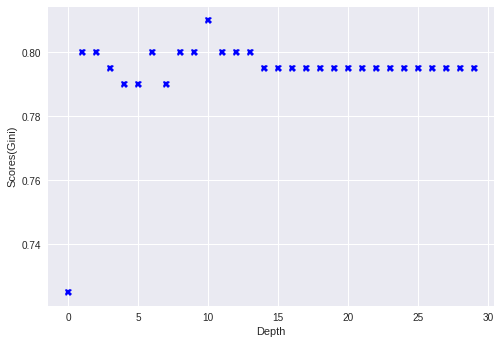

In [0]:
## ADD YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

score = [0] * 30
for depth in range(30):
  base = tree.DecisionTreeClassifier(random_state=0, max_depth = depth + 1)
  bagging = BaggingClassifier(
      base,
      n_estimators=10,
      max_samples=400, 
      bootstrap=True, 
      random_state=0)
  bagging.fit(x_train, y_train)
  score[depth] = bagging.score(X=x_test, y=y_test)
  #bagging_acc = (y_test==bagging.predict(x_test)).mean()
  #print(score)
  
plt.plot(score,'bX')
plt.ylabel('Scores(Gini)')
plt.xlabel('Depth')
plt.show()
# TODO plot versus what? too many features

7.2 Find the best number of estimators(depth = 11)

[0.73, 0.72, 0.765, 0.765, 0.785, 0.785, 0.815, 0.79, 0.8, 0.81, 0.795, 0.795, 0.795, 0.78, 0.785, 0.785, 0.79, 0.785, 0.79, 0.79, 0.785, 0.79, 0.78, 0.785, 0.78, 0.785, 0.78, 0.785, 0.79, 0.79]


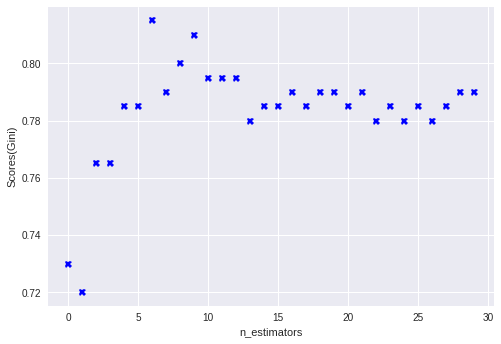

In [0]:
score = [0] * 30
for n in range(30):
  base = tree.DecisionTreeClassifier(random_state=0, max_depth = 11)
  bagging = BaggingClassifier(
      base,
      n_estimators=n+1,
      max_samples=400, 
      bootstrap=True, 
      random_state=0)
  bagging.fit(x_train, y_train)
  score[n] = bagging.score(X=x_test, y=y_test)
  #bagging_acc = (y_test==bagging.predict(x_test)).mean()
# print(score)
  
plt.plot(score,'bX')
plt.ylabel('Scores(Gini)')
plt.xlabel('n_estimators')
plt.show()

7.3 Find the best max_samples(depth = 11, n_estimators = 7)

In [1]:
score_trap = [0] * 80
score_notrap = [0] * 80
for max_sample in range(10, 800, 10):
  base = tree.DecisionTreeClassifier(random_state=0, max_depth = 11)
  bagging = BaggingClassifier(
      base,
      n_estimators=7,
      max_samples=max_sample, 
      bootstrap=True, 
      random_state=0)
  bagging.fit(x_train, y_train)
  score_trap[max_sample//10] = bagging.score(X=x_test, y=y_test)
  #bagging_acc = (y_test==bagging.predict(x_test)).mean()
# print(score)
for max_sample in range(10, 800, 10):
  base = tree.DecisionTreeClassifier(random_state=0, max_depth = 11)
  bagging = BaggingClassifier(
      base,
      n_estimators=7,
      max_samples=max_sample, 
      bootstrap=False, 
      random_state=0)
  bagging.fit(x_train, y_train)
  score_notrap[max_sample//10] = bagging.score(X=x_test, y=y_test)

plt.plot(score_trap,'bX',label="Bootstrap")
plt.plot(score_notrap,'rX',label="NO Bootstrap")
plt.legend()
plt.ylabel('Scores(Gini)')
plt.xlabel('max_samples(*10)')
plt.show()

NameError: ignored

In [0]:
  base = tree.DecisionTreeClassifier(random_state=0, max_depth = 11)
  bagging = BaggingClassifier(
      base,
      n_estimators=7,
      max_samples=max_sample, 
      bootstrap=False, 
      random_state=0)
  bagging.fit(x_train, y_train)
  score_best = bagging.score(X=x_test, y=y_test)
  print('score using best parameters is {:.2f}%'.format(score_best * 100))

8) Why do we use Bootstraping when we create our datasets? Did you use replacement ? Why ? (1 points) 


a. Use the whole dataset to train the model is expensive.Also we use Bootstraping to resample from the original dataset, and then decrease model variance by averaging.

b. Yes, I used(because bootstrap=True).
When we use replacement, samples may be repeated and each resampled set is different. If we resample without
replacement, then when the resampled size is equal to the original data size, each resampled set is the same to the
original one

9)  Use a Decision Forest to classify the new dataset (4 points)



In [0]:
## ADD YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=10, 
                             max_depth=1,
                             bootstrap=True,
                             min_samples_split=400, 
                             random_state=0)
clf = clf.fit(x_train, y_train)
score = clf.score(X=x_test, y=y_test)
print('score of this Decision Forest is {:.2f}%'.format(score * 100)) 

score of this Decision Forest is 74.50%


10) Modulate the number of trees to 1-99 with a step of 10. Plot accuracy versus number of trees. (4 points)



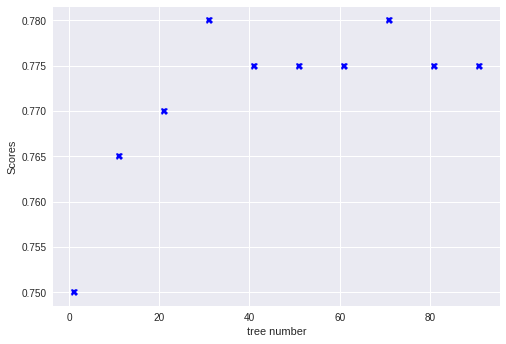

In [0]:
## ADD YOUR CODE HERE
i = 0
scores = [0] * 10
for n in range(1,100,10):
  clf = RandomForestClassifier(n_estimators=n, 
                               # max_depth=5,
                               # bootstrap=True,
                               # min_samples_split=300, 
                               random_state=0)
  clf = clf.fit(x_train, y_train)
  scores[i] = clf.score(X=x_test, y=y_test)
  i += 1

plt.plot(range(1,99,10), scores, 'bX')
plt.ylabel('Scores')
plt.xlabel('tree number')
plt.show()

11) Modulate the depth of  the trees from 1 to 20 - use best number of trees from above. Plot the accuracy versus depth. (4 points)



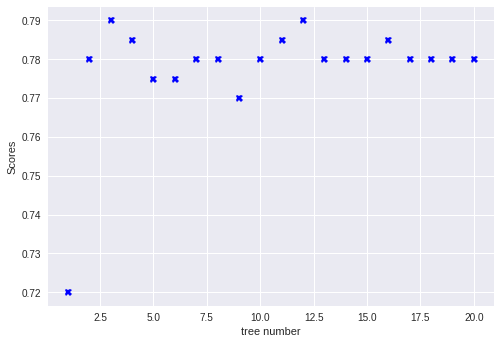

In [0]:
## ADD YOUR CODE HERE
i = 0
scores = [0] * 20
for d in range(0,20):
  clf = RandomForestClassifier(n_estimators=31, 
                               max_depth=d+1,
                               # bootstrap=True,
                               # min_samples_split=300, 
                               random_state=0)
  clf = clf.fit(x_train, y_train)
  scores[i] = clf.score(X=x_test, y=y_test)
  i += 1

plt.plot(range(1,21), scores, 'bX')
plt.ylabel('Scores')
plt.xlabel('tree number')
plt.show()

12) Comment on the performance change while you modulate depth of trees and number of trees (3 points)

In [0]:
## ADD YOUR CODE HERE

13) Visualise how the classification split is done in relation to the data both for Decision Tree and Decision Forest (3 points)

In [0]:
from sklearn.manifold.t_sne import TSNE
from sklearn.neighbors.classification import KNeighborsClassifier

'''def plot_decision_boundary(model,X,y):
    Y_pred=model.predict(X)
    X_Train_embedded = TSNE(n_components=2).fit_transform(X)
    # create meshgrid
    resolution = 100 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
    X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, Y_pred) 
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    plt.contourf(xx, yy, voronoiBackground)
    plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
    plt.show()'''

def plot_decision_boundary(model,X,y):
    Y_pred=model.predict(X)
    # create meshgrid
    resolution = 100 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X[:,1]), np.max(X[:,1])
    X2d_ymin, X2d_ymax = np.min(X[:,2]), np.max(X[:,2])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
#     background_model = KNeighborsClassifier(n_neighbors=1).fit(X[:,1:3], Y_pred) 
    voronoiBackground = model.predict(pol_transform.transform(np.c_[xx.ravel(), yy.ravel()]))
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    plt.contourf(xx, yy, voronoiBackground)
    plt.scatter(X[:,1], X[:,2], c=y, marker='.')
    plt.show()

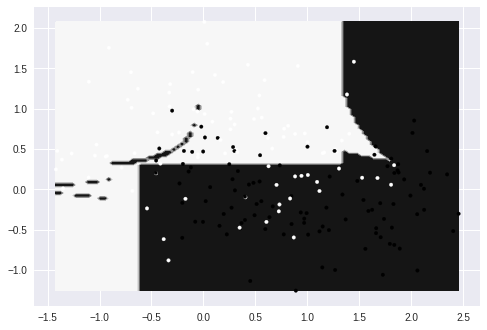

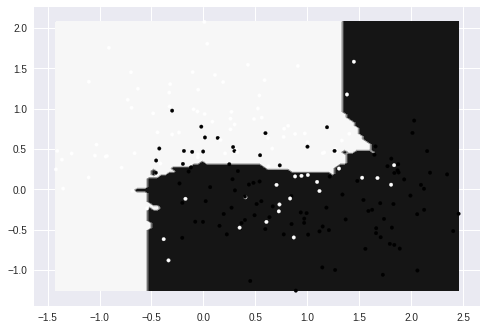

In [0]:
## ADD YOUR CODE HERE
clf_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4)
clf_tree = clf_tree.fit(x_train, y_train)
clf_forest = RandomForestClassifier(n_estimators=31, 
                             max_depth=4,
                             #bootstrap=True,
                             #min_samples_split=300, 
                             random_state=0)
clf_forest = clf_forest.fit(x_train, y_train)
plot_decision_boundary(clf_tree, x_test, y_test)
plot_decision_boundary(clf_forest, x_test, y_test)

## Question 2 (50 Points)
In this question we will be using the fashion-MNIST dataset for image classification. 

If you are interested, you may find relevant information regarding the dataset in this paper:
Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The data is provided under `/vol/lab/course/416/data/fashion`. The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-dimensional vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 classes, which are labelled as follows:
0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Your tasks are** (all tasks carry equal marks):
- Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
- Train and compare an Adaboost classifier with a decision tree 
- Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity 
- Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice
- What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

In [0]:
# load the data
import numpy as np
import pandas as pd

data_dir = '/vol/lab/course/416/data/fashion/'

df_train = pd.read_csv(data_dir + 'fashion_mnist_train.csv')
df_test = pd.read_csv(data_dir + 'fashion_mnist_test.csv')

x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
y_train = df_train['label'].as_matrix().astype(np.uint8)
x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
y_test = df_test['label'].as_matrix().astype(np.uint8)

In [0]:
## ADD YOUR CODE HERE